In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data=pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\Projects\iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#basic details about the dataset
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
#checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
# Filling the missing values by taking the median of respective column after grouping by Classification
data.groupby(['Classification'])[['SL','SW','PL']].median()

,SL,SW,PL
Classification,,,
Iris-setosa,5.00,3.4,1.50
Iris-versicolor,5.85,2.8,4.35
Iris-virginica,6.50,3.0,5.55


In [9]:
data['SL'] = data['SL'].fillna(data.groupby('Classification')['SL'].transform('median'))
data['SW'] = data['SW'].fillna(data.groupby('Classification')['SW'].transform('median'))
data['PL'] = data['PL'].fillna(data.groupby('Classification')['PL'].transform('median'))

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

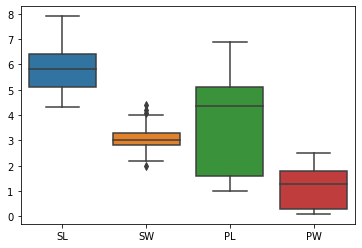

In [11]:
#checking for outliers
sns.boxplot(data=data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#Classification is the target and to know the count of each class we use value_counts()
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [14]:
# spliiting the dataset into features and target
#taking 'Classification' as target(y) and all other as X
X=data.drop(['Classification'],axis=1)
y=data['Classification']

In [15]:
# splitting into test and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [16]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
std_slc.fit(X_train)
X_train = std_slc.transform(X_train)
X_test = std_slc.transform(X_test)

In [17]:
X_train.shape

(120, 4)

In [18]:
X_test.shape

(30, 4)

In [19]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
logit_model=LogisticRegression(random_state=42,multi_class='multinomial')
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))

Accuracy is: 0.967
f1 score is: 0.967


In [20]:
#Support Vector Machine
from sklearn.svm import SVC
svm_model=SVC(random_state=42)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))

Accuracy is: 0.967
f1 score is: 0.967


In [21]:
#KNeighbours
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))

Accuracy is: 0.967
f1 score is: 0.967


In [22]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))

Accuracy is: 1.0
f1 score is: 1.0


In [23]:
#Random Forest Tree 
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),2))

Accuracy is: 1.0
f1 score is: 1.0


# Random forest and Decision tree algorithms gives the best result here